# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
# location of each set of sign data
training_file = "trafficSignsData/train.p"
validation_file= "trafficSignsData/valid.p"
testing_file = "trafficSignsData/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# check function to make sure same number of images as labels in each set - no error idicates OK
assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))



---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:

import numpy as np


# get length of training data
n_train = (len(X_train))


# get length of validation data
n_validation = (len(X_valid))

# get length of test data
n_test = (len(X_test))

# shape of an traffic sign image
image_shape = X_train[0].shape


# count number of id/classes couting unqiue labels in training data
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

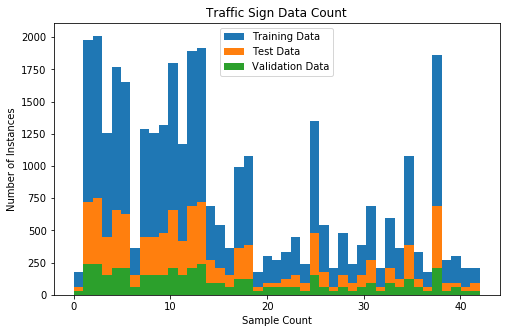

In [3]:
# Import the `pyplot` module
import matplotlib.pyplot as plt
%matplotlib inline

# explicitly set figure size
fig = plt.figure(figsize=(8,5))


# Make a histogram with 43 bins of the `labels` data
plt.hist(train['labels'], 43, label='Training Data')
plt.hist(test['labels'], 43, label='Test Data')
plt.hist(valid['labels'], 43, label='Validation Data')

plt.title('Traffic Sign Data Count')
plt.xlabel('Sample Count')
plt.ylabel('Number of Instances')

plt.legend(loc='upper center')

# Show the plot
plt.savefig('./output_data/HistogramDataExplore.png') 
plt.show();

In [4]:
# use numpy to load data from file into 2D array - obtain name value from each 
data = np.loadtxt('signnames.csv', dtype={'names':('category_id', 'category_name'),'formats':('<i8', 'U50')}, skiprows=1, delimiter=",")

# check data set and csv have same number of categories
assert(len(data)) == (len(np.unique(train['labels'])))
assert(len(data)) == (len(np.unique(valid['labels'])))
assert(len(data)) == (len(np.unique(test['labels'])))


In [5]:


# array to hold position of a matching image for each class
traffic_image_position = []

traffic_index = 0
# loop through dataset to get a position of image that can match each category id
for i in range(n_classes):
    for i in range(len(y_train)):
        if y_train[i] == traffic_index:
            traffic_image_position.append(i)
            traffic_index +=1


In [6]:
# function to return array of category counts

def data_count(dataset):
    data_categories, category_count = np.unique(dataset, return_counts = 1)
    return category_count


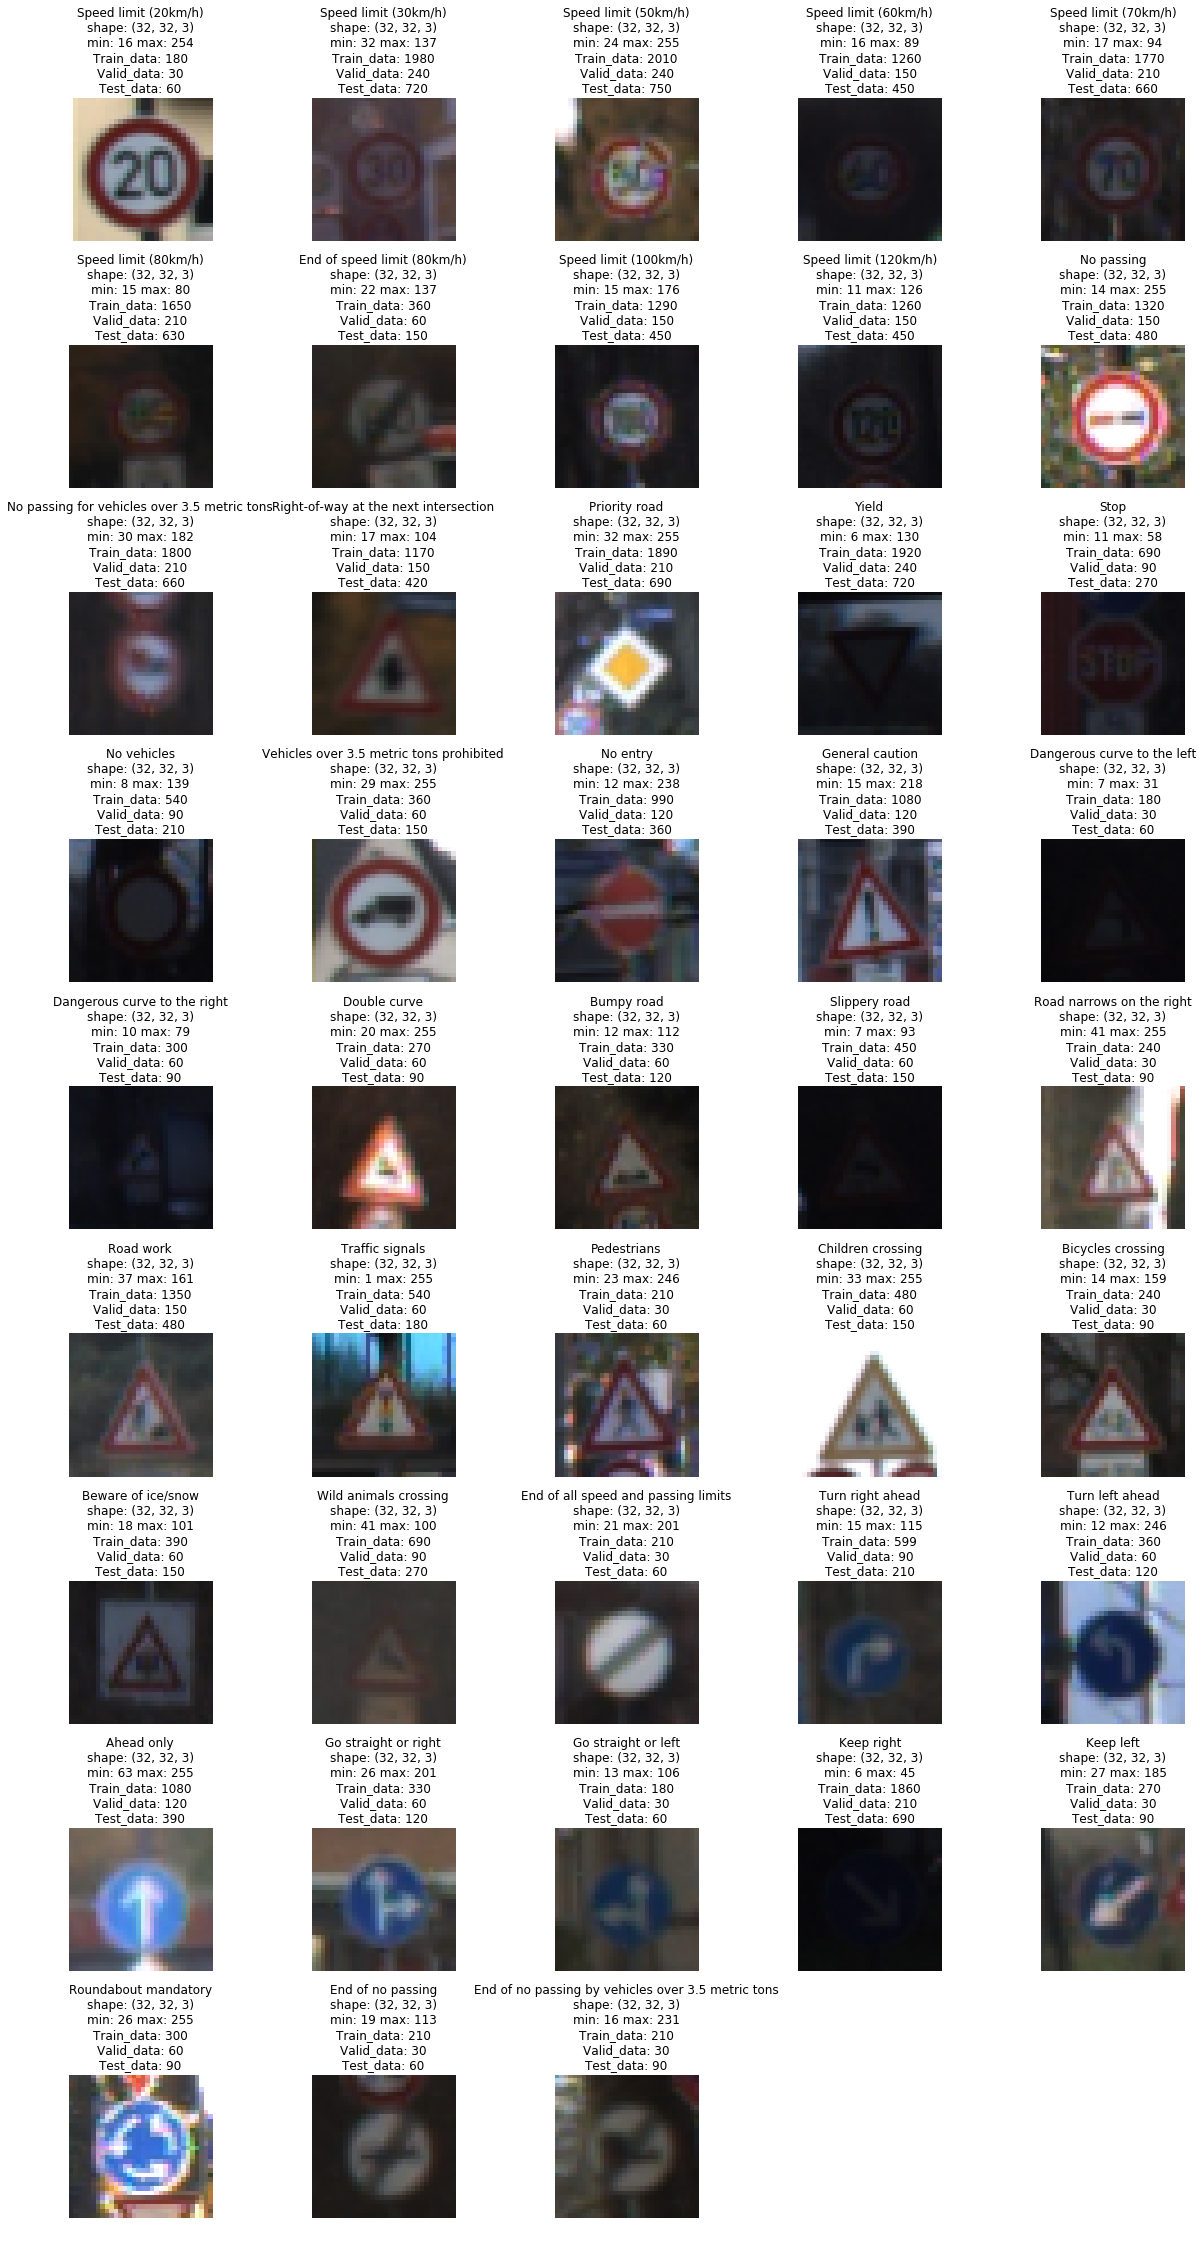

In [7]:
# Fill out the subplots with sample of each images in dataset

# explicitly set figure size
fig = plt.figure(figsize=(20,40))

for i in range(len(traffic_image_position)):
    plt.subplot(9, 5, i+1)
    plt.axis('off')
    plt.imshow(X_train[traffic_image_position[i]])
    # increase spacings between plots to stop any overlap
    plt.subplots_adjust(wspace=0.7,hspace=0.25)
    
    # create plot title from data name and count of data in each set
    title = "{0}\n shape: {1}\n min: {2} max: {3}\n Train_data: {4}\n Valid_data: {5}\n Test_data: {6}".format(data['category_name'][i],
                                                                        X_train[traffic_image_position[i]].shape,
                                                                        X_train[traffic_image_position[i]].min(),
                                                                        X_train[traffic_image_position[i]].max(),
                                                                        data_count(y_train)[i],
                                                                        data_count(y_valid)[i],
                                                                        data_count(y_test)[i])
    # add custom title to each plot
    plt.title(title, wrap=True)

plt.savefig('./output_data/OriginalEachImagesample.png') 
plt.show()


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### Preprocess the data.


* normalise
* convert to grayscale
* reshape histogram


In [8]:
# normalise the data

# normalisation using min max scaling
# x norm = X - Xmin / Xmax - Xmin
def normalise(X,other):
    # unity-based normalization [0,1]
    X_norm = (X - np.min(X))/np.ptp(X)
    
    # Normalised [-1,1]
    #X_norm = 2*(X - np.min(X))/np.ptp(X)-1

    # Normalised [0,255] as integer
    #X_norm = (255*(X - np.min(X))/np.ptp(X)).astype(int)
    
    
    #X_norm = (X_train - 128)/128 
    
    #std = np.std(X)
    #std = 128
    #mean = np.mean(X)
    #mean = 128
    #X_norm = ((other - mean) / std)
    
    
    return X_norm

X_train = normalise(X_train,X_train)
X_valid = normalise(X_valid,X_train)

print("Training Data size: ", X_train[0].shape)
print("Validation Data size: ", X_valid[0].shape)




Training Data size:  (32, 32, 3)
Validation Data size:  (32, 32, 3)


In [9]:
# convert to grayscale

# convert to grayscale using average
def grayscale_average(X):
    X = X.mean(axis=-1,keepdims=1)
    return X

X_train = grayscale_average(X_train)
X_valid = grayscale_average(X_valid)

print("Training Data size: ", X_train[0].shape)
print("Validation Data size: ", X_valid[0].shape)


Training Data size:  (32, 32, 1)
Validation Data size:  (32, 32, 1)


In [10]:
# Apply localized histogram localization  

from skimage import exposure

def localise_histogram(X):
    for i in range(X.shape[0]):
        X[i] = exposure.equalize_hist(X[i])
        #X[i] = exposure.equalize_adapthist(X[i], clip_limit=0.03)
        
        #print (np.max(X[i]))
        #print (np.min(X[i]))
        
        #X = X.reshape(X.shape)
        
        return X
    

X_train = localise_histogram(X_train)
X_valid = localise_histogram(X_valid)


print("Training Data size: ", X_train[0].shape)
print("Validation Data size: ", X_valid[0].shape)




Training Data size:  (32, 32, 1)
Validation Data size:  (32, 32, 1)


/anaconda3/envs/IntroToTensorFlow/lib/python3.6/site-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


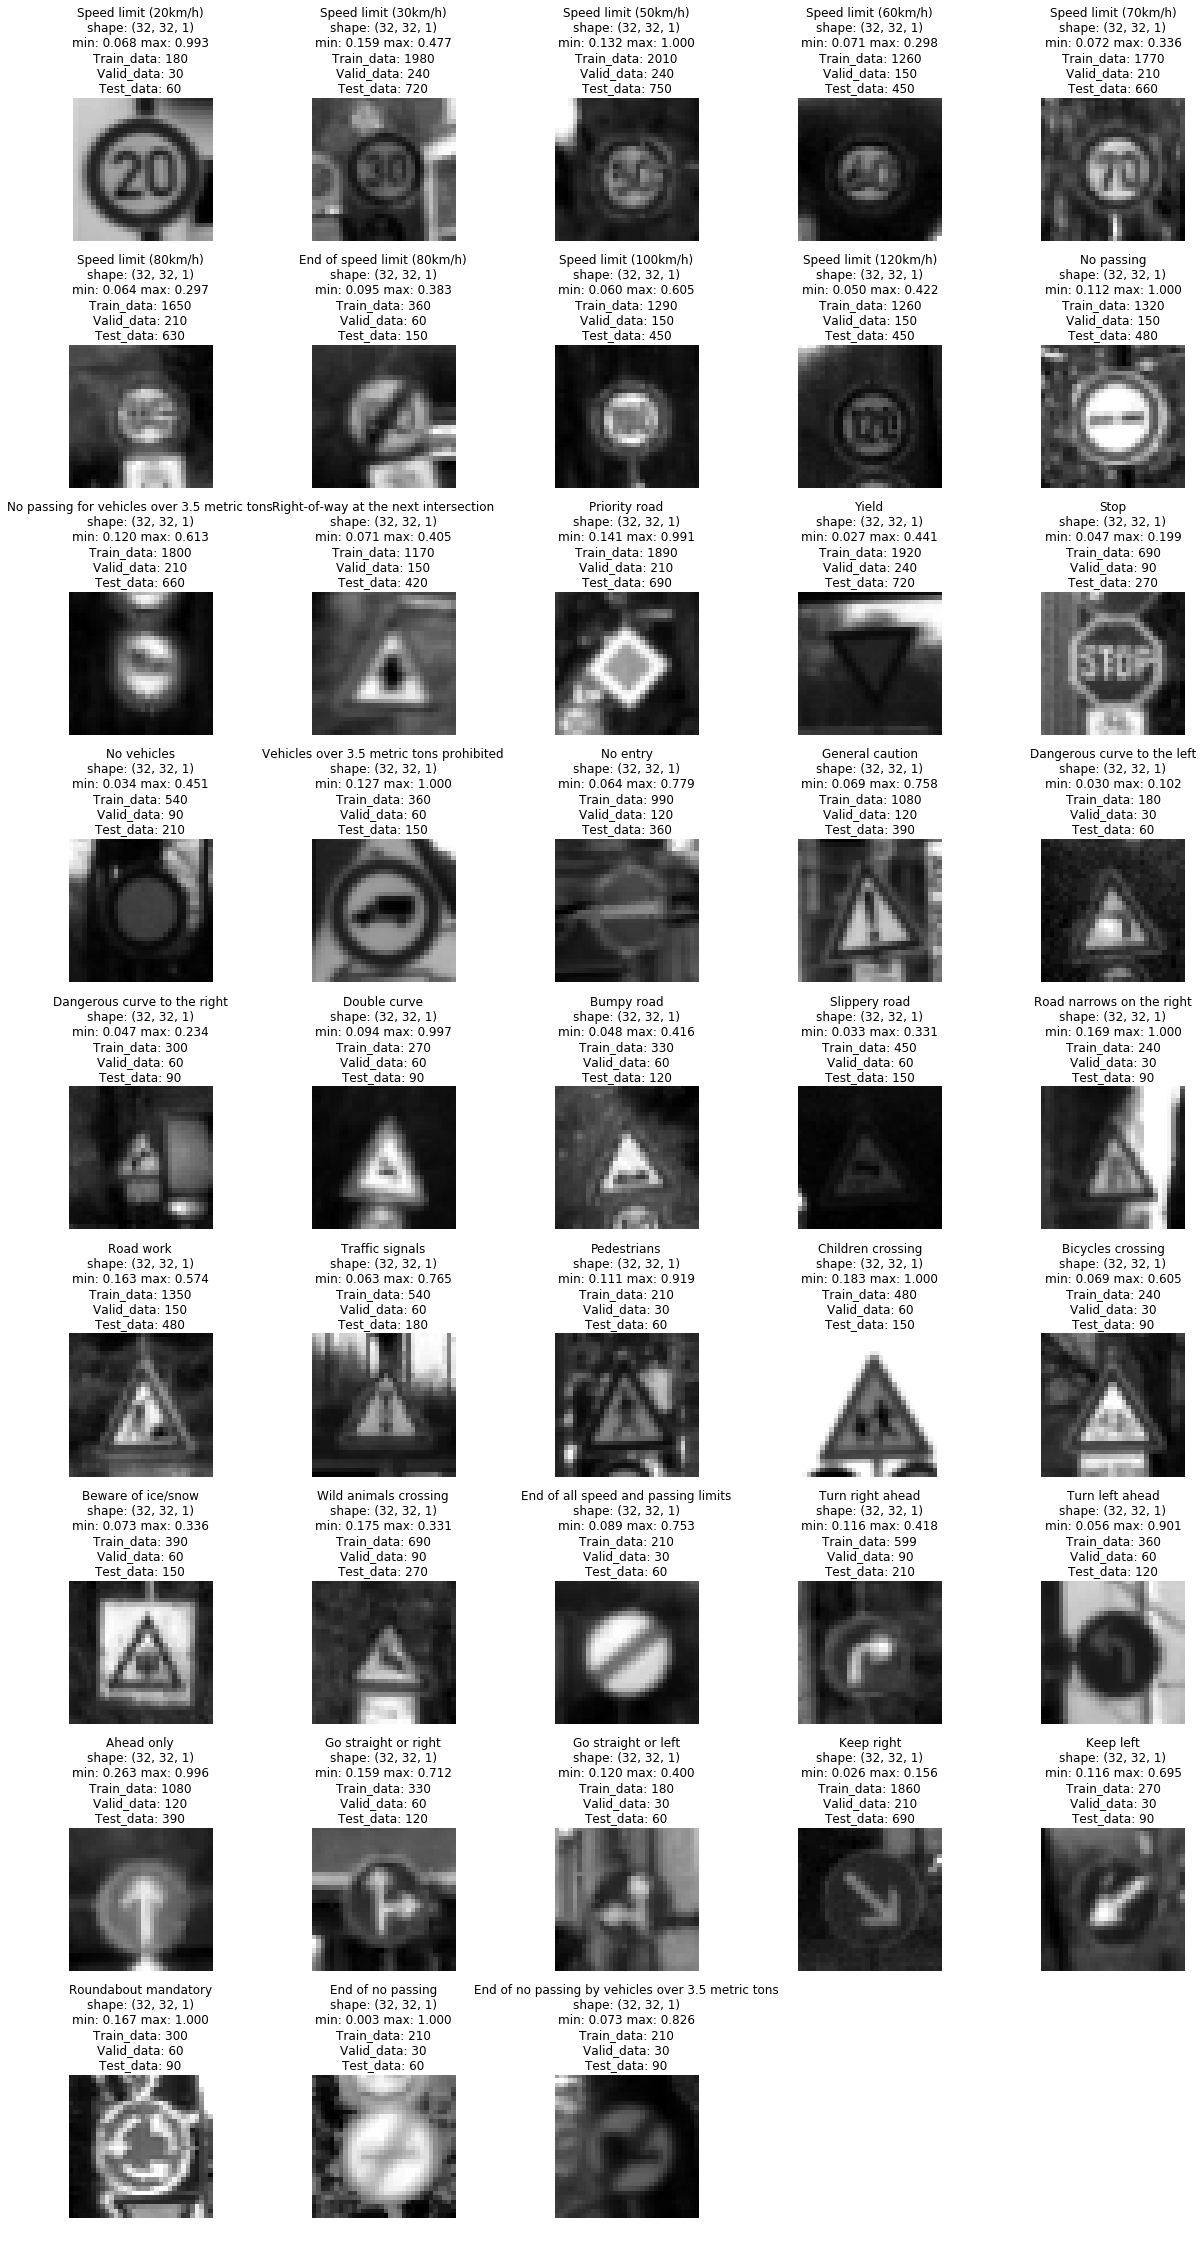

In [11]:
# Fill out the subplots with sample of each images in normalised/grayscale dataset

# explicitly set figure size
fig = plt.figure(figsize=(20,40))

for i in range(len(traffic_image_position)):
    plt.subplot(9, 5, i+1)
    plt.axis('off')
    plt.imshow(X_train[traffic_image_position[i]].squeeze(), cmap='gray')
    
    # increase spacings between plots to stop any overlap
    plt.subplots_adjust(wspace=0.7,hspace=0.25)
    
    # create plot title from data name and count of data in each set
    title = "{0}\n shape: {1}\n min: {2:0.3f} max: {3:0.3f}\n Train_data: {4}\n Valid_data: {5}\n Test_data: {6}".format(data['category_name'][i],
                                                                        X_train[traffic_image_position[i]].shape,
                                                                        X_train[traffic_image_position[i]].min(),
                                                                        X_train[traffic_image_position[i]].max(),
                                                                        data_count(y_train)[i],
                                                                        data_count(y_valid)[i],
                                                                        data_count(y_test)[i])
    
    # add custom title to each plot
    plt.title(title, wrap=True)

plt.savefig('./output_data/NormalisedEachImagesample.png') 
plt.show()

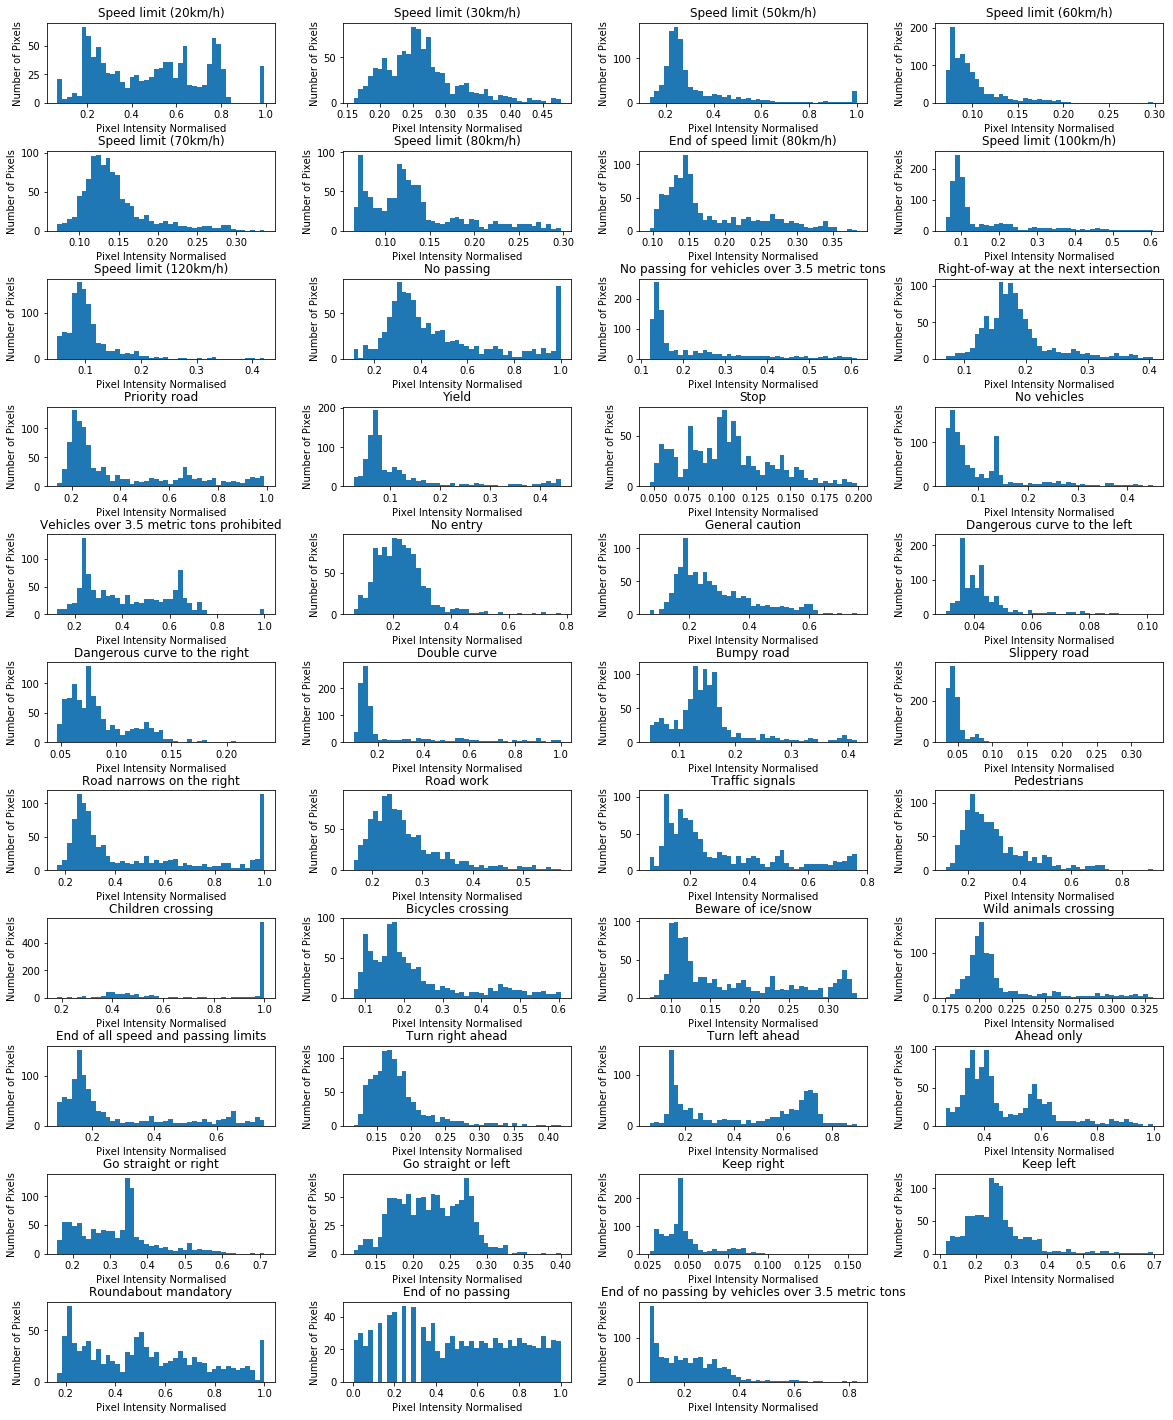

In [12]:
# Import the pyplot module
import matplotlib.pyplot as plt 

fig = plt.figure(figsize=(20,25))

for i in range(len(traffic_image_position)):
    
    # Make a histogram with 43 bins of the category data
    
    plt.subplot(11, 4, i+1)
    plt.hist(X_train[traffic_image_position[i]].ravel(), 43)

    # increase spacings between plots to stop any overlap
    plt.subplots_adjust(wspace=0.3,hspace=0.6)

    plt.xlabel('Pixel Intensity Normalised')
    plt.ylabel('Number of Pixels')
    
    # add custom title to each plot
    plt.title(data['category_name'][i], wrap=True)

# Show the plot
plt.savefig('./output_data/NormaliseEachImagesampleHistogram.png') 
plt.show()

### Model Architecture

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** ReLU activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** ReLU activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. 

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** ReLU activation function.

**Dropout.** Apply Dropout.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** ReLU activation function.

**Dropout.** Apply Dropout.

**Layer 5: Fully Connected (Logits).** This should have 43 outputs.

### Train, Validate and Test the Model

In [13]:
import tensorflow as tf

# initiliase placeholder variable: (BATCH_SIZE, height, width, depth)
x = tf.placeholder(tf.float32, (None, 32, 32, 1))

# Placeholder for labels
y = tf.placeholder(tf.int32, (None))

# One-hot encoding of labels
one_hot_y = tf.one_hot(y, 43)

# dropout function - probability of keeping training neurons 0.9 = dropout 10% of neurons
keep_prob = tf.placeholder(tf.float32)

/anaconda3/envs/IntroToTensorFlow/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### LeNet Model

In [14]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID', name='conv1') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1, name='conv1_activation')

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='conv1_pooling')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID', name='conv2') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2,name='conv2_activation')

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='conv2_pooling')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W, name='fc1') + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1, name='fc1_activation')
    # apply dropout to fully connected layer
    fc1 = tf.nn.dropout(fc1, keep_prob, name='fc1_dropout')

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W, name='fc2') + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2,name='fc2_activation')
    # apply dropout to fully connected layer
    fc2 = tf.nn.dropout(fc2, keep_prob, name='fc2_dropout')

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [15]:
# Learning rate
rate = 0.00098

# Create instance of LeNet to pass in images
logits = LeNet(x)

# Compare logits output to the ground-truth (one hot encoding) and calculate error (cross entropy)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = one_hot_y)
# Average cross entropy from all training images
loss_operation = tf.reduce_mean(cross_entropy)
# Adam Optimiser is  alternative to SGD
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
# backpropagation to update the network and minimise training loss
training_operation = optimizer.minimize(loss_operation)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



### Evaluate the Model

In [16]:
# Compare the logit prediction to the one hot encoded ground-truth label
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
# Calculate the model's overall accuracy by averaging the individual prediction accuracies
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_to_eval = len(X_data)
    #print("Evaluate data")
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_to_eval, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict = {x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_to_eval

### Train the model

In [17]:
import tensorflow as tf

EPOCHS = 75
BATCH_SIZE = 142

In [18]:
# TensorFlow training session
from sklearn.utils import shuffle

import time

start_time = time.time()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    validation_accuracy_scores = []
    training_accuracy_scores = []
    
    
    print("Training ...")
    print()
    for i in range(EPOCHS):
        # Shuffle the training data to ensure that training isn't biased by the order of the images
        X_train, y_train = shuffle(X_train, y_train)
        # Break training data into batches and train the model on the each batch
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict = {x: batch_x, y: batch_y, keep_prob: 0.5})
        
        # at end of each EPOCH evaluate the model on validation data
        validation_accuracy = evaluate(X_valid, y_valid)
        validation_accuracy_scores.append(validation_accuracy)
        training_accuracy = evaluate(X_train, y_train)
        training_accuracy_scores.append(training_accuracy)
        print("EPOCH {0} ...".format(i + 1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print()
    
    # Save the model
    saver.save(sess, './Final_Trained_sign_classifier_model')
    print("Model saved")
    # notify training ended
    print("Training Complete")
    print("Training time taken: {0:.2f} seconds".format(time.time() - start_time))

Training ...

EPOCH 1 ...
Validation Accuracy = 0.445
Training Accuracy = 0.526

EPOCH 2 ...
Validation Accuracy = 0.731
Training Accuracy = 0.769

EPOCH 3 ...
Validation Accuracy = 0.785
Training Accuracy = 0.832

EPOCH 4 ...
Validation Accuracy = 0.835
Training Accuracy = 0.884

EPOCH 5 ...
Validation Accuracy = 0.836
Training Accuracy = 0.901

EPOCH 6 ...
Validation Accuracy = 0.864
Training Accuracy = 0.925

EPOCH 7 ...
Validation Accuracy = 0.893
Training Accuracy = 0.942

EPOCH 8 ...
Validation Accuracy = 0.897
Training Accuracy = 0.951

EPOCH 9 ...
Validation Accuracy = 0.903
Training Accuracy = 0.952

EPOCH 10 ...
Validation Accuracy = 0.916
Training Accuracy = 0.961

EPOCH 11 ...
Validation Accuracy = 0.921
Training Accuracy = 0.970

EPOCH 12 ...
Validation Accuracy = 0.925
Training Accuracy = 0.973

EPOCH 13 ...
Validation Accuracy = 0.922
Training Accuracy = 0.978

EPOCH 14 ...
Validation Accuracy = 0.934
Training Accuracy = 0.981

EPOCH 15 ...
Validation Accuracy = 0.937
Tr

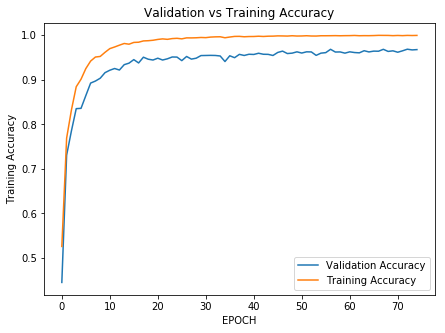

In [19]:
fig = plt.figure(figsize=(7,5))

plt.plot(validation_accuracy_scores, label="Validation Accuracy")
plt.plot(training_accuracy_scores,label="Training Accuracy")

plt.title("Validation vs Training Accuracy")
plt.xlabel('EPOCH')
plt.ylabel('Training Accuracy')

plt.legend(loc='lower right')

plt.savefig('./output_data/ModelAccuracy.png')

plt.show()

### Condition Test Data

In [20]:
# pre process test images


print("PrePrep Test Data size: ", X_test[0].shape)

X_test = normalise(X_test,X_train)
X_test = grayscale_average(X_test)
X_test = localise_histogram(X_test)

print("Test Data size for model: ", X_test[0].shape)

PrePrep Test Data size:  (32, 32, 3)
Test Data size for model:  (32, 32, 1)


/anaconda3/envs/IntroToTensorFlow/lib/python3.6/site-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


### Test the Model & Evaluate the results

### Evaluate Results

In [21]:


with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    #saver.restore(sess, "./Final_Trained_sign_classifier_model")
    
    train_accuracy = evaluate(X_train, y_train);
    valid_accuracy = evaluate(X_valid, y_valid);
    test_accuracy = evaluate(X_test, y_test);
    
    print("\nTraining Accuracy = {:.3f}".format(train_accuracy))
    print("Validation Accuracy = {:.3f}".format(valid_accuracy))
    print("Test Accuracy = {:.3f}".format(test_accuracy))
 

INFO:tensorflow:Restoring parameters from ./Final_Trained_sign_classifier_model

Training Accuracy = 0.999
Validation Accuracy = 0.968
Test Accuracy = 0.940


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [22]:
# import glob - easy way to mport files from folder
import glob

# import opencv for image manipulation
import cv2

import numpy as np

# arrays to hold sign data from internet
X_signs = []
y_signs = []

files = glob.glob ('donor_signs/*.jpg')
for myFile in files:
    #read in image and append to array
    image = cv2.cvtColor(cv2.imread(myFile), cv2.COLOR_BGR2RGB)
    # resize the image to 32x32 for LeNet
    resize = cv2.resize(image, (32, 32), interpolation = cv2.INTER_AREA ) 
    
    # INTER_NEAREST  INTER_AREA
    
    X_signs.append (resize)
    
    #get information from filename
    filename = myFile
    #find / to trim filename
    marker_pos = (filename.index("/"))
    #strip off directory and *.jpg
    filename = (filename[marker_pos+1:-4])
    
    # extract the number from file to understand sign category
    under_bar_pos = (filename.index("_"))
    # append sign category to array
    y_signs.append(int(filename[0:under_bar_pos]))
    
    
print(y_signs)

print('X_signs shape:', np.array(X_signs).shape)




[12, 28, 28, 34, 25, 17, 38, 3, 18, 23, 1, 29, 2, 11, 32]
X_signs shape: (15, 32, 32, 3)


In [23]:
# use numpy to load data from file into 2D array - obtain name value from each 
data = np.loadtxt('signnames.csv', dtype={'names':('category_id', 'category_name'),'formats':('<i8', 'U50')}, skiprows=1, delimiter=",")


        

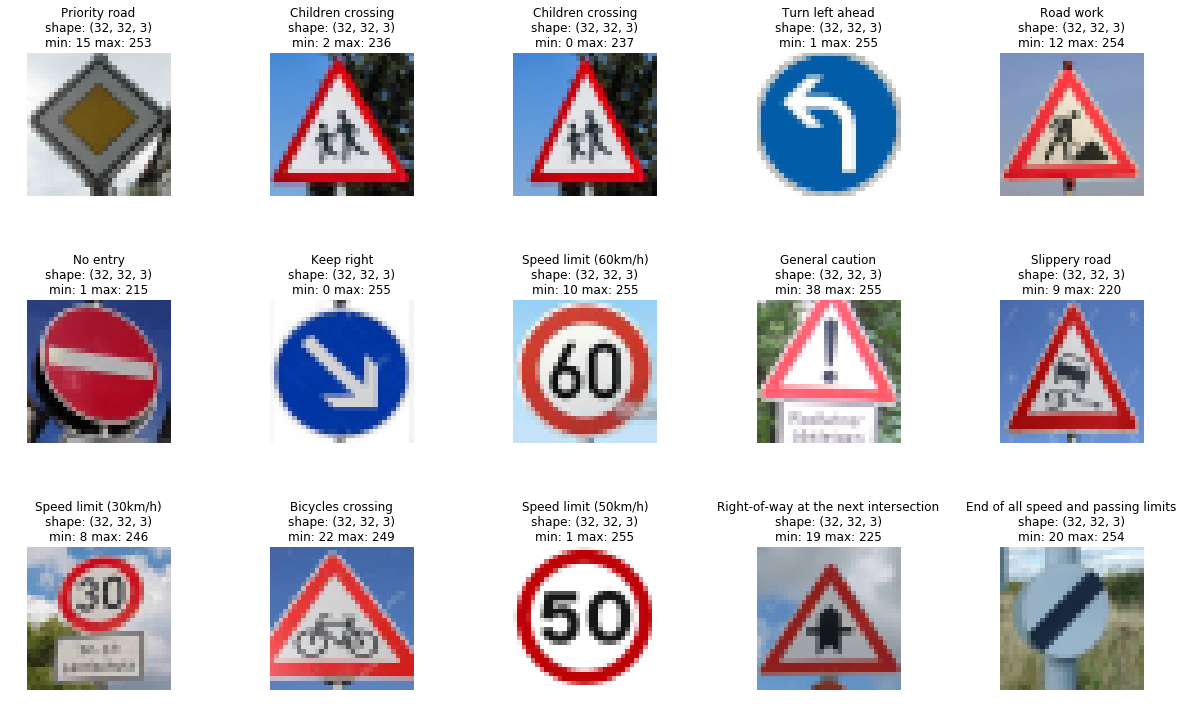

In [24]:

# Import the `pyplot` module
import matplotlib.pyplot as plt 
%matplotlib inline
# Fill out the subplots with sample of each images in dataset

# explicitly set figure size
fig = plt.figure(figsize=(20,40))

for i in range(len(X_signs)):
    plt.subplot(9, 5, i+1)
    plt.axis('off')
    plt.imshow(X_signs[i])
    # increase spacings between plots to stop any overlap
    plt.subplots_adjust(wspace=0.7,hspace=0.25)
    
    # create plot title from data name and count of data in each set
    title = "{0}\n shape: {1}\n min: {2} max: {3}".format(data['category_name'][y_signs[i]],
                                                          X_signs[i].shape,
                                                          X_signs[i].min(),
                                                          X_signs[i].max())
    # add custom title to each plot
    plt.title(title, wrap=True)


plt.savefig('./output_data/OriginalExtraSigns.png')    
plt.show()

### PreProcess Signs

In [25]:
# pre process test images


print("PrePrep Test Data size: ", X_signs[0].shape)

X_signs = normalise(X_signs,X_train)
X_signs = grayscale_average(X_signs)
X_signs = localise_histogram(X_signs)

print("Test Data size for model: ", X_signs[0].shape)

PrePrep Test Data size:  (32, 32, 3)
Test Data size for model:  (32, 32, 1)


/anaconda3/envs/IntroToTensorFlow/lib/python3.6/site-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


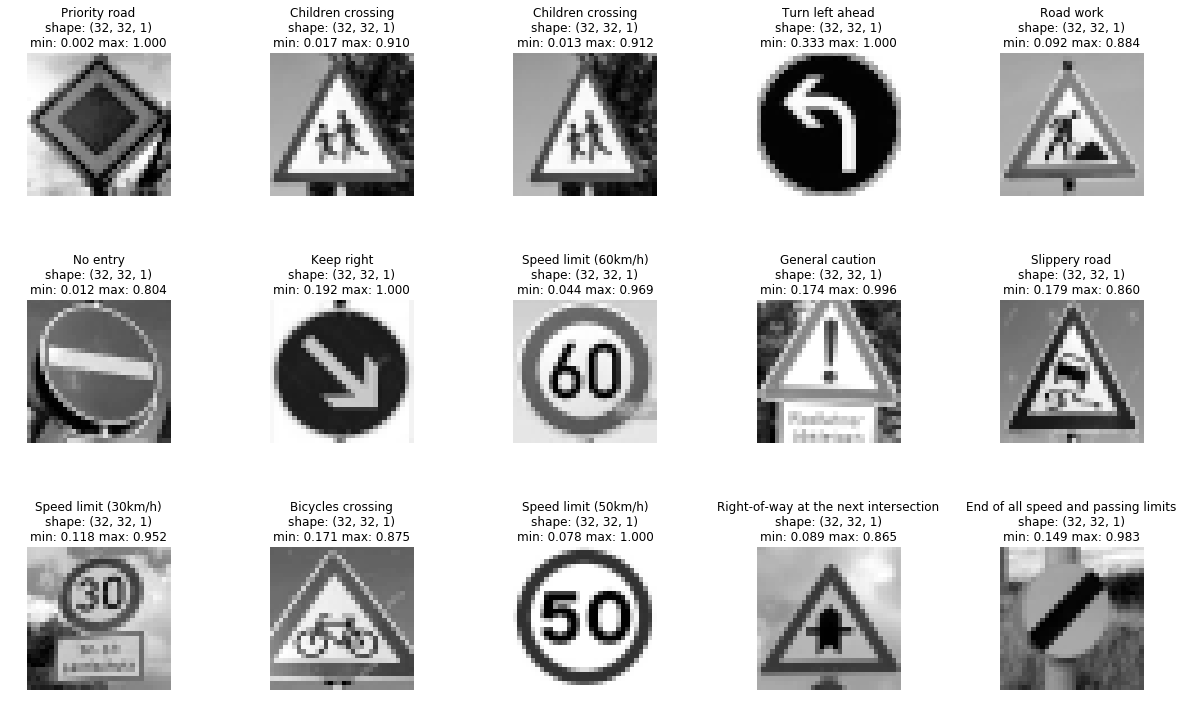

In [26]:
# Import the `pyplot` module
import matplotlib.pyplot as plt 
%matplotlib inline
# Fill out the subplots with sample of each images in dataset

# explicitly set figure size
fig = plt.figure(figsize=(20,40))

for i in range(len(X_signs)):
    plt.subplot(9, 5, i+1)
    plt.axis('off')
    plt.imshow(X_signs[i].squeeze(), cmap='gray')
    # increase spacings between plots to stop any overlap
    plt.subplots_adjust(wspace=0.7,hspace=0.25)
    
    # create plot title from data name and count of data in each set
    title = "{0}\n shape: {1}\n min: {2:.3f} max: {3:.3f}".format(data['category_name'][y_signs[i]],
                                                          X_signs[i].shape,
                                                          X_signs[i].min(),
                                                          X_signs[i].max())
    # add custom title to each plot
    plt.title(title, wrap=True)

plt.savefig('./output_data/NormalisedExtraSigns.png') 
plt.show()

### Predict the Sign Type for Each Image

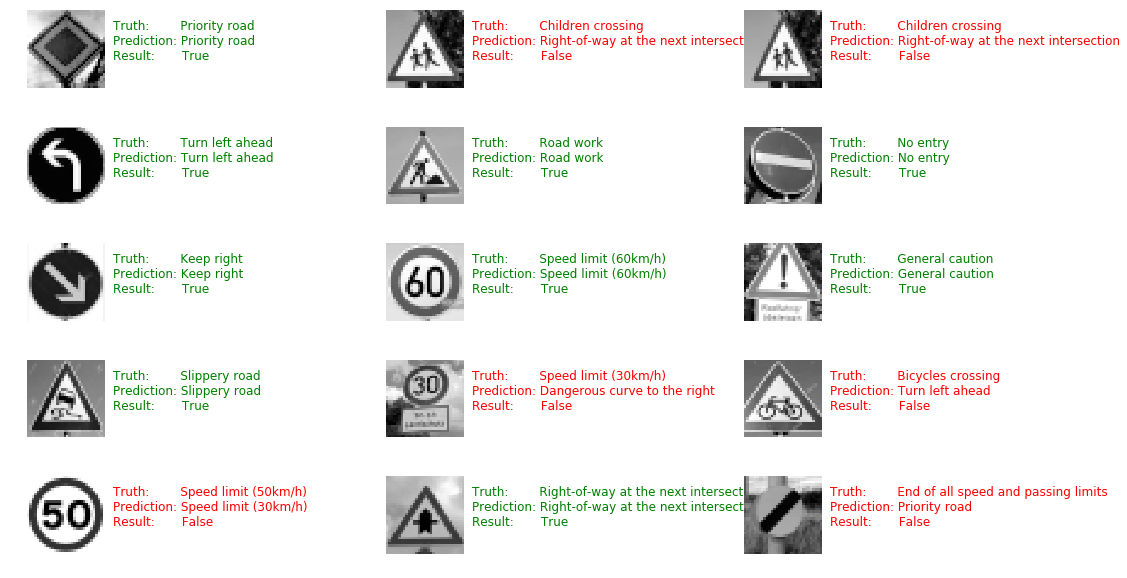

In [27]:

correct_prediction = tf.argmax(logits, 1)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# hide tensorflow debuging info
tf.logging.set_verbosity(tf.logging.WARN)

    
softmax = tf.nn.softmax(logits)
prediction_of_five = tf.nn.top_k(softmax, 5)

with tf.Session() as sess:
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, "./Final_Trained_sign_classifier_model")
    logits_signs = sess.run(logits, feed_dict={x: X_signs, keep_prob:1.0})
    
    
    
    fig = plt.figure(figsize=(15, 10))
    
    for i in range(len(logits_signs)):
        
        truth = data['category_name'][y_signs[i]]
        prediction = data['category_name'][(np.argmax(logits_signs[i]))]
        result = (y_signs[i] == np.argmax(logits_signs[i]))
        
        #print("Truth:      {}\nPredicted:  {}\nResult:     {}".format(truth, prediction,is_correct))

        plt.subplot(5, 3, i+1)
        plt.axis('off')
        plt.imshow(X_signs[i].squeeze(), cmap='gray')
        # increase spacings between plots to stop any overlap
        plt.subplots_adjust(wspace=2.0,hspace=0.5)
    
        # create plot title from data name and count of data in each set
        #title = "Truth: {0}\n Prediction: {1}\n Result: {2} ".format(data['category_name'][y_signs[i]],
                                                          #prediction,
                                                          #result)
        
        color='green' if truth == prediction else 'red'
        plt.text(35, 20, "Truth:        {0}\nPrediction: {1}\nResult:       {2}".format(truth, prediction, result), 
             fontsize=12, color=color)
        
    plt.savefig('./output_data/NormalisedExtraSignsPredictionResult.png') 
    plt.show()
        


### Analyze Performance

In [28]:
# Compare the logit prediction to the one hot encoded ground-truth label
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
# Calculate the model's overall accuracy by averaging the individual prediction accuracies
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_to_eval = len(X_data)
    #print("Evaluate data")
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_to_eval, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict = {x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_to_eval

In [29]:
import tensorflow as tf

with tf.Session() as sess:
    saver.restore(sess, "./Final_Trained_sign_classifier_model")
    
    sign_accuracy = evaluate(X_signs, y_signs)
    percent_accurate = sign_accuracy*100

    print("\nSign Recognition Accuracy = {0:.2f} %".format(percent_accurate))



Sign Recognition Accuracy = 60.00 %


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

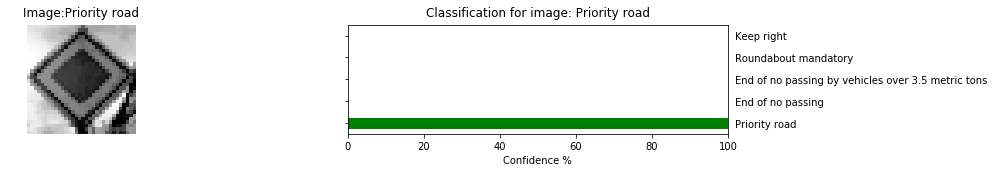

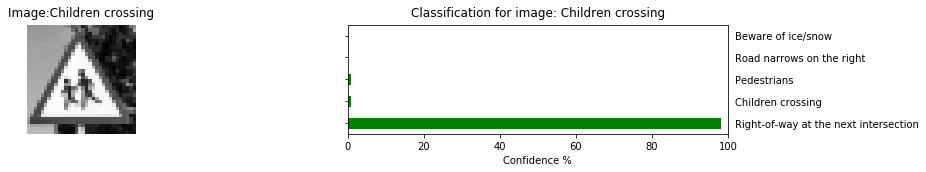

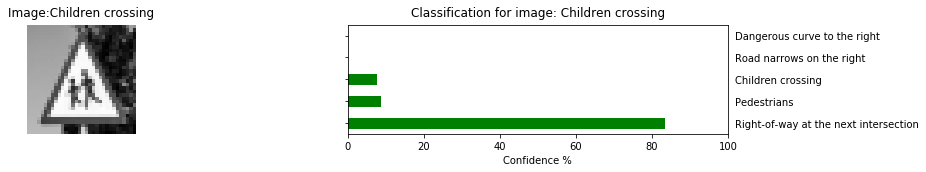

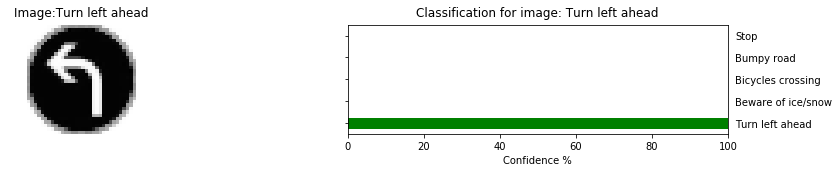

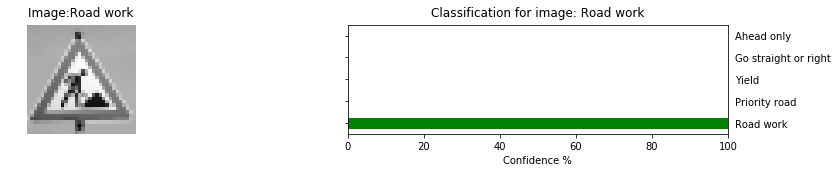

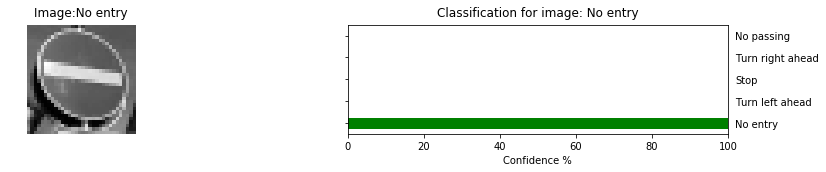

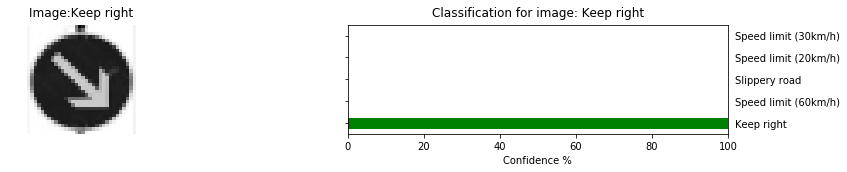

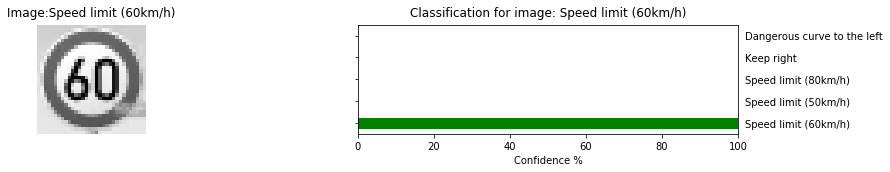

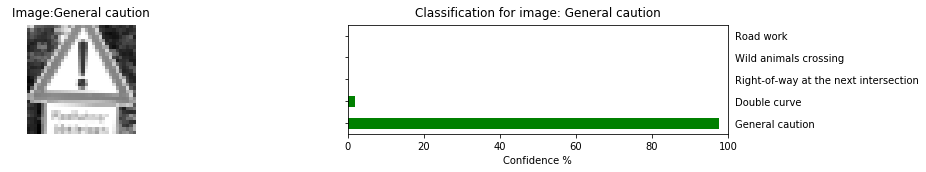

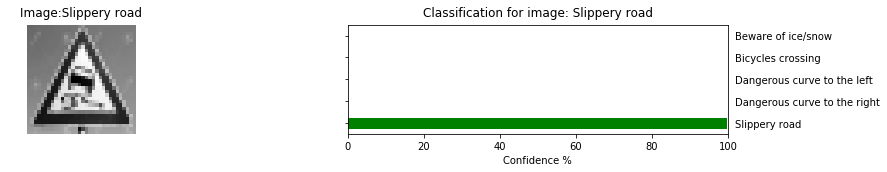

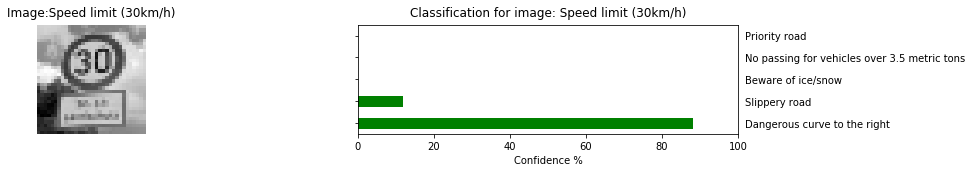

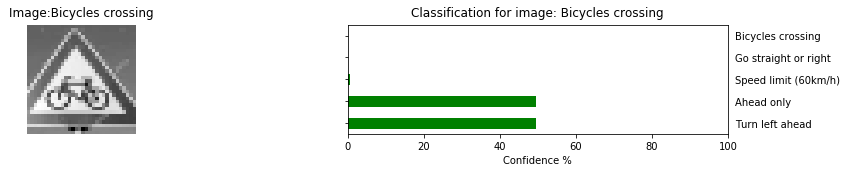

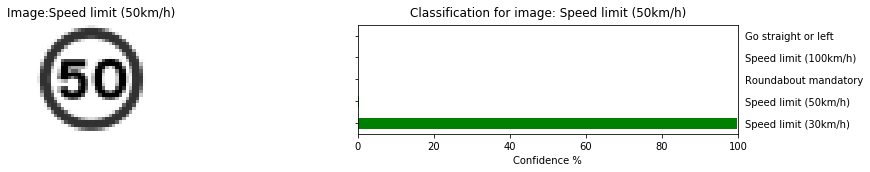

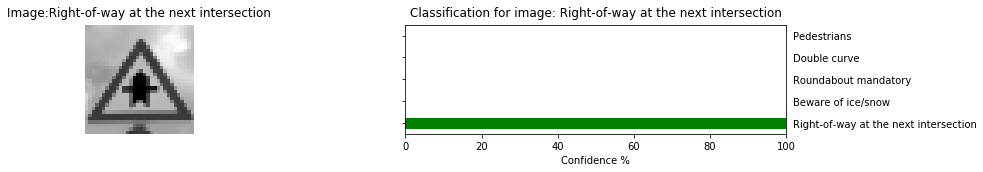

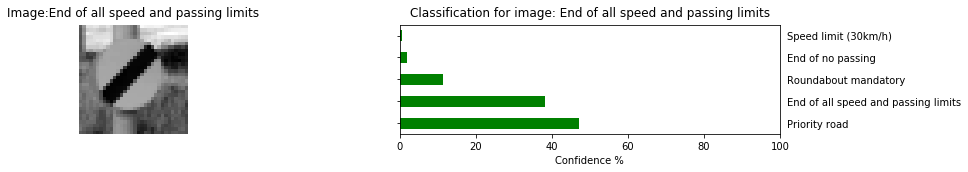

In [30]:


softmax_logits = tf.nn.softmax(logits)

# use top_k to output model prediction, parameter 5 = top five
top_k = tf.nn.top_k(softmax_logits, 5)

with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    # get the saved trained model
    saver.restore(sess, "./Final_Trained_sign_classifier_model")
    
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: X_signs, keep_prob: 1.0})
    
    # get the top 5 matches as percentages and corresponding indices from model
    my_top_k = sess.run(top_k, feed_dict={x: X_signs, keep_prob: 1.0})
    #print(my_top_k.values[0])
    #print(my_top_k.values[0][0])
    #print(my_top_k.indices[0])
    #print(y_signs[0])
    

    sign_rows = int(len(X_signs))
    sign_cols = 6
    
    sign_array = []
    scores_arrray = []
    
    for j in range(len(X_signs)):
        y = data['category_name'][y_signs[j]]
        sign_rows = []
        score = []
        #print("\n\nActual")
        #print("indices:  {0} name: {1}".format(y_signs[j],y))
        #print("\nPredicted")
        for i in range(len(my_top_k.indices[j])):
            sign_name = data['category_name'][my_top_k.indices[j][i]]
            confidence = my_top_k.values[j][i]*100
            sign_rows.append(sign_name)
            score.append(confidence)
            
            #print("indices:  {0} name: {1} confidence: {2:.2f}%".format(my_top_k.indices[j][i],sign_name,confidence))
        sign_array.append(sign_rows)
        scores_arrray.append(score)

    for i in  range(len(sign_array)):
        #  create the figure
        fig = plt.figure(figsize=(15,2))

        # show original image being classified
        # subplot 1 - left side
        ax1 = plt.subplot(1, 2, 1)
        plt.imshow(X_signs[i].squeeze(), cmap='gray')
        plt.axis('off')
        # add title based on correct name of image
        image_title = "Image:{0}".format(data['category_name'][y_signs[i]])
        plt.text(0.5, 1.08, image_title,horizontalalignment='center', fontsize=12, transform = ax1.transAxes)

        # subplot 2 - right side
        ax2 = plt.subplot(1, 2, 2)

        # create variables to hold sign names and classifications % output fro model
        bar_values = scores_arrray[i]
        ind = sign_array[i]

        # create horizontal bar chart to represent top 5 classifications
        plt.barh(ind, bar_values, 0.5, color='green',align='center')
        plt.tick_params(axis='both', which='both', labelleft=False, labelright=True, labeltop=False, labelbottom=True)
        plt.xlim(0,100.0)
        plt.xlabel("Confidence %")

        # Add title to bar chart
        figure_title = "Classification for image: {0}".format(data['category_name'][y_signs[i]])
        plt.text(0.5, 1.08, figure_title,horizontalalignment='center', fontsize=12, transform = ax2.transAxes)
        
        plt.savefig('./output_data/{0}NormalisedExtraSignsSoftmaxTop5Results.png'.format(i)) 


plt.show()


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [32]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

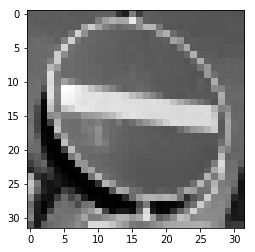

Test Data shape:  (32, 32, 1)


In [54]:
feature_image = []
feature_image.append(X_signs[5])


plt.imshow(feature_image[0].squeeze(), cmap='gray')

plt.show()

print("Test Data shape: ", feature_image[0].shape)

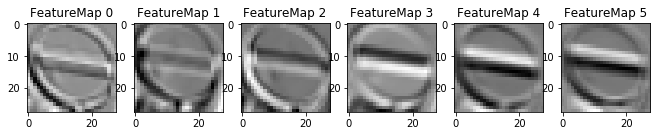

In [55]:


#conv1
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    saver.restore(sess, "./Final_Trained_sign_classifier_model")
    
    conv1 = sess.graph.get_tensor_by_name('conv1:0')
    outputFeatureMap(feature_image, conv1)
    plt.savefig('./output_data/conv1_output_5') 

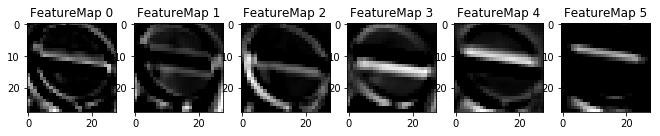

In [56]:
#conv1_activation
with tf.Session() as sess:
    saver.restore(sess, "./Final_Trained_sign_classifier_model")
    
    conv1_activation = sess.graph.get_tensor_by_name('conv1_activation:0')
    outputFeatureMap(feature_image, conv1_activation)
    plt.savefig('./output_data/conv1_activation_output_5') 

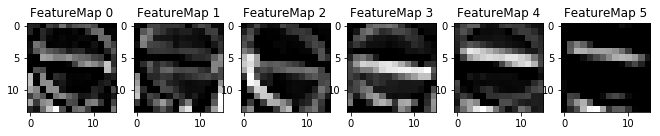

In [57]:
#conv1_pooling
with tf.Session() as sess:
    saver.restore(sess, "./Final_Trained_sign_classifier_model")
    
    conv1_pooling = sess.graph.get_tensor_by_name('conv1_pooling:0')
    outputFeatureMap(feature_image, conv1_pooling)
    plt.savefig('./output_data/conv1_pooling_output_5') 

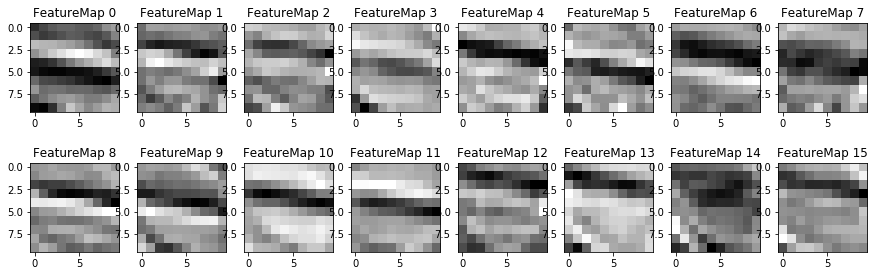

In [58]:
#conv2
with tf.Session() as sess:
    saver.restore(sess, "./Final_Trained_sign_classifier_model")
    
    conv2 = sess.graph.get_tensor_by_name('conv2:0')
    outputFeatureMap(feature_image, conv2)
    plt.savefig('./output_data/conv2_output_5') 

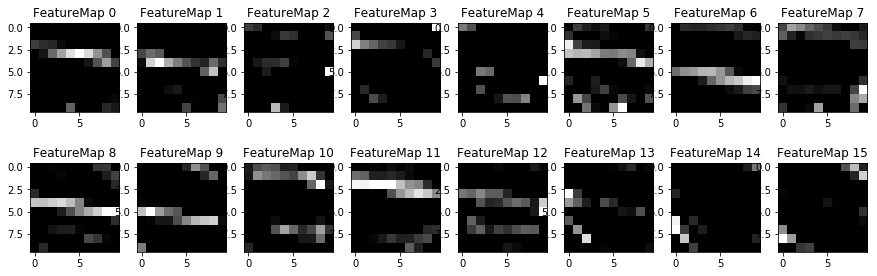

In [59]:
#conv2_activation
with tf.Session() as sess:
    saver.restore(sess, "./Final_Trained_sign_classifier_model")
    
    conv2_activation = sess.graph.get_tensor_by_name('conv2_activation:0')
    outputFeatureMap(feature_image, conv2_activation)
    plt.savefig('./output_data/conv2_activation_output_5')

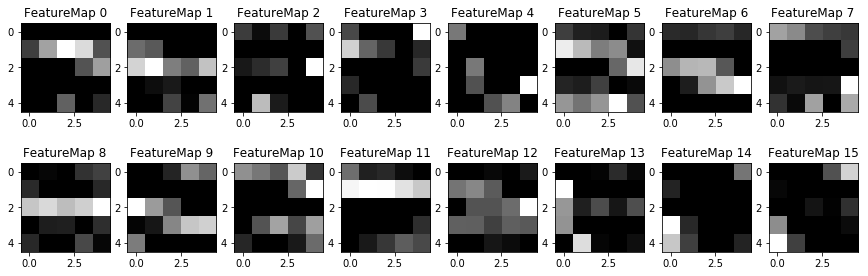

In [60]:
#conv2_pooling
with tf.Session() as sess:
    saver.restore(sess, "./Final_Trained_sign_classifier_model")
    
    conv2_pooling = sess.graph.get_tensor_by_name('conv2_pooling:0')
    outputFeatureMap(feature_image, conv2_pooling)
    plt.savefig('./output_data/conv2_pooling_output_5')